<h2>Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2>Webscrape and create dataframe for Points Per Game.

In [2]:
url_ppg = "https://www.ncaa.com/stats/basketball-women/d1"
ppg_df = pd.read_html(url_ppg)[0]
display(ppg_df)

,Rank,Name,Team,PPG
0,1,Caitlin Clark,Iowa,32.0
1,2,JuJu Watkins,Southern California,27.1
2,3,Lucy Olsen,Villanova,23.3
3,4,Chellia Watson,Buffalo,23.0
4,5,Elizabeth Kitley,Virginia Tech,22.8
5,6,Hannah Hidalgo,Notre Dame,22.6
6,7,Rachael Rose,Wofford,22.3
7,8,Dyaisha Fair,Syracuse,22.2
8,9,Izzy Higginbottom,Arkansas St.,22.2
9,10,McKenna Hofschild,Colorado St.,22.1


<h2>Webscrape and create dataframe for Assists Per Game.

In [3]:
url_ast1 = "https://www.ncaa.com/stats/basketball-women/d1/current/individual/106"
ast1 = pd.read_html(url_ast1)[0]
url_ast2 = "https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p2"
ast2 = pd.read_html(url_ast2)[0]
url_ast3 = "https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p3"
ast3 = pd.read_html(url_ast3)[0]
url_ast4 = "https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p4"
ast4 = pd.read_html(url_ast4)[0]
url_ast5 = "https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p5"
ast5 = pd.read_html(url_ast5)[0]

<h2>Combine the 5 APG dataframes to create a single dataframe.

In [4]:
ast_df = pd.concat([ast1, ast2, ast3, ast4, ast5], axis=0)
display(ast_df)

,Rank,Name,Team,Cl,Height,Position,G,AST,APG
0,1,Caitlin Clark,Iowa,Sr.,6-0,G,37,334,9.0
1,2,McKenna Hofschild,Colorado St.,Sr.,5-2,G,31,227,7.3
2,3,Katie Dinnebier,Drake,Jr.,5-8,G,35,243,6.9
3,4,Georgia Amoore,Virginia Tech,Sr.,5-6,G,32,218,6.8
4,5,Benthe Versteeg,Sacramento St.,So.,5-9,G,31,208,6.7
...,...,...,...,...,...,...,...,...,...
45,246,Sh'Diamond McKnight,Mississippi Val.,Jr.,5-7,G,31,99,3.2
46,247,Deja Kelly,North Carolina,Sr.,5-8,G,33,105,3.2
47,248,Liz Smith,Pacific,Sr.,5-9,G,28,89,3.2
48,249,Sydney Burns,UC Davis,Jr.,5-9,G,34,108,3.2


<h2>Join APG dataframe to PPG dataframe.

In [5]:
final_df = pd.merge(ppg_df, ast_df, on="Name", how="inner")
display(final_df)

,Rank_x,Name,Team_x,PPG,Rank_y,Team_y,Cl,Height,Position,G,AST,APG
0,1,Caitlin Clark,Iowa,32.0,1,Iowa,Sr.,6-0,G,37,334,9.0
1,2,JuJu Watkins,Southern California,27.1,-,Southern California,Fr.,6-2,G,34,112,3.3
2,3,Lucy Olsen,Villanova,23.3,134,Villanova,Jr.,5-9,G,34,129,3.8
3,4,Chellia Watson,Buffalo,23.0,-,Buffalo,Sr.,5-8,G,33,108,3.3
4,6,Hannah Hidalgo,Notre Dame,22.6,24,Notre Dame,Fr.,5-6,G,35,194,5.5
5,7,Rachael Rose,Wofford,22.3,28,Wofford,Jr.,5-7,G,30,163,5.4
6,8,Dyaisha Fair,Syracuse,22.2,173,Syracuse,Sr.,5-5,G,32,114,3.6
7,9,Izzy Higginbottom,Arkansas St.,22.2,155,Arkansas St.,Jr.,5-7,G,26,95,3.7
8,10,McKenna Hofschild,Colorado St.,22.1,2,Colorado St.,Sr.,5-2,G,31,227,7.3


<h2>Subset dataframe to only the fields that will be used. </h2>
<h2>Elizabeth Kitley was not in the APG dataframe because she didn't make the top 250, which dropped her from the final dataframe due to the inner join.  I got her APG number from ESPN and inserted a record for her so that I could have the top 10 scorers instead of just 9.

In [6]:
final_df = final_df[["Name", "PPG", "APG"]]
kitley = {'Name': 'Elizabeth Kitley', 'PPG': 22.8, "APG": 1.8}
final_df = final_df.append(kitley, ignore_index=True)
display(final_df)

C:\Users\294747\AppData\Local\Temp\1\ipykernel_13620\555911671.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(kitley, ignore_index=True)


,Name,PPG,APG
0,Caitlin Clark,32.0,9.0
1,JuJu Watkins,27.1,3.3
2,Lucy Olsen,23.3,3.8
3,Chellia Watson,23.0,3.3
4,Hannah Hidalgo,22.6,5.5
5,Rachael Rose,22.3,5.4
6,Dyaisha Fair,22.2,3.6
7,Izzy Higginbottom,22.2,3.7
8,McKenna Hofschild,22.1,7.3
9,Elizabeth Kitley,22.8,1.8


<h2>Create a field for APG:PPG ratio and reset index so that Elizabeth Kitley is in the correct order by PPG.

In [7]:
final_df["Asst:Pts"] = '1' + " : " + round(final_df["PPG"] / final_df["APG"], 1).astype(str)
final_df = final_df.sort_values("PPG", ascending=False)
final_df = final_df.reset_index(drop=True)
display(final_df)

,Name,PPG,APG,Asst:Pts
0,Caitlin Clark,32.0,9.0,1 : 3.6
1,JuJu Watkins,27.1,3.3,1 : 8.2
2,Lucy Olsen,23.3,3.8,1 : 6.1
3,Chellia Watson,23.0,3.3,1 : 7.0
4,Elizabeth Kitley,22.8,1.8,1 : 12.7
5,Hannah Hidalgo,22.6,5.5,1 : 4.1
6,Rachael Rose,22.3,5.4,1 : 4.1
7,Dyaisha Fair,22.2,3.6,1 : 6.2
8,Izzy Higginbottom,22.2,3.7,1 : 6.0
9,McKenna Hofschild,22.1,7.3,1 : 3.0


<h2>Create visual

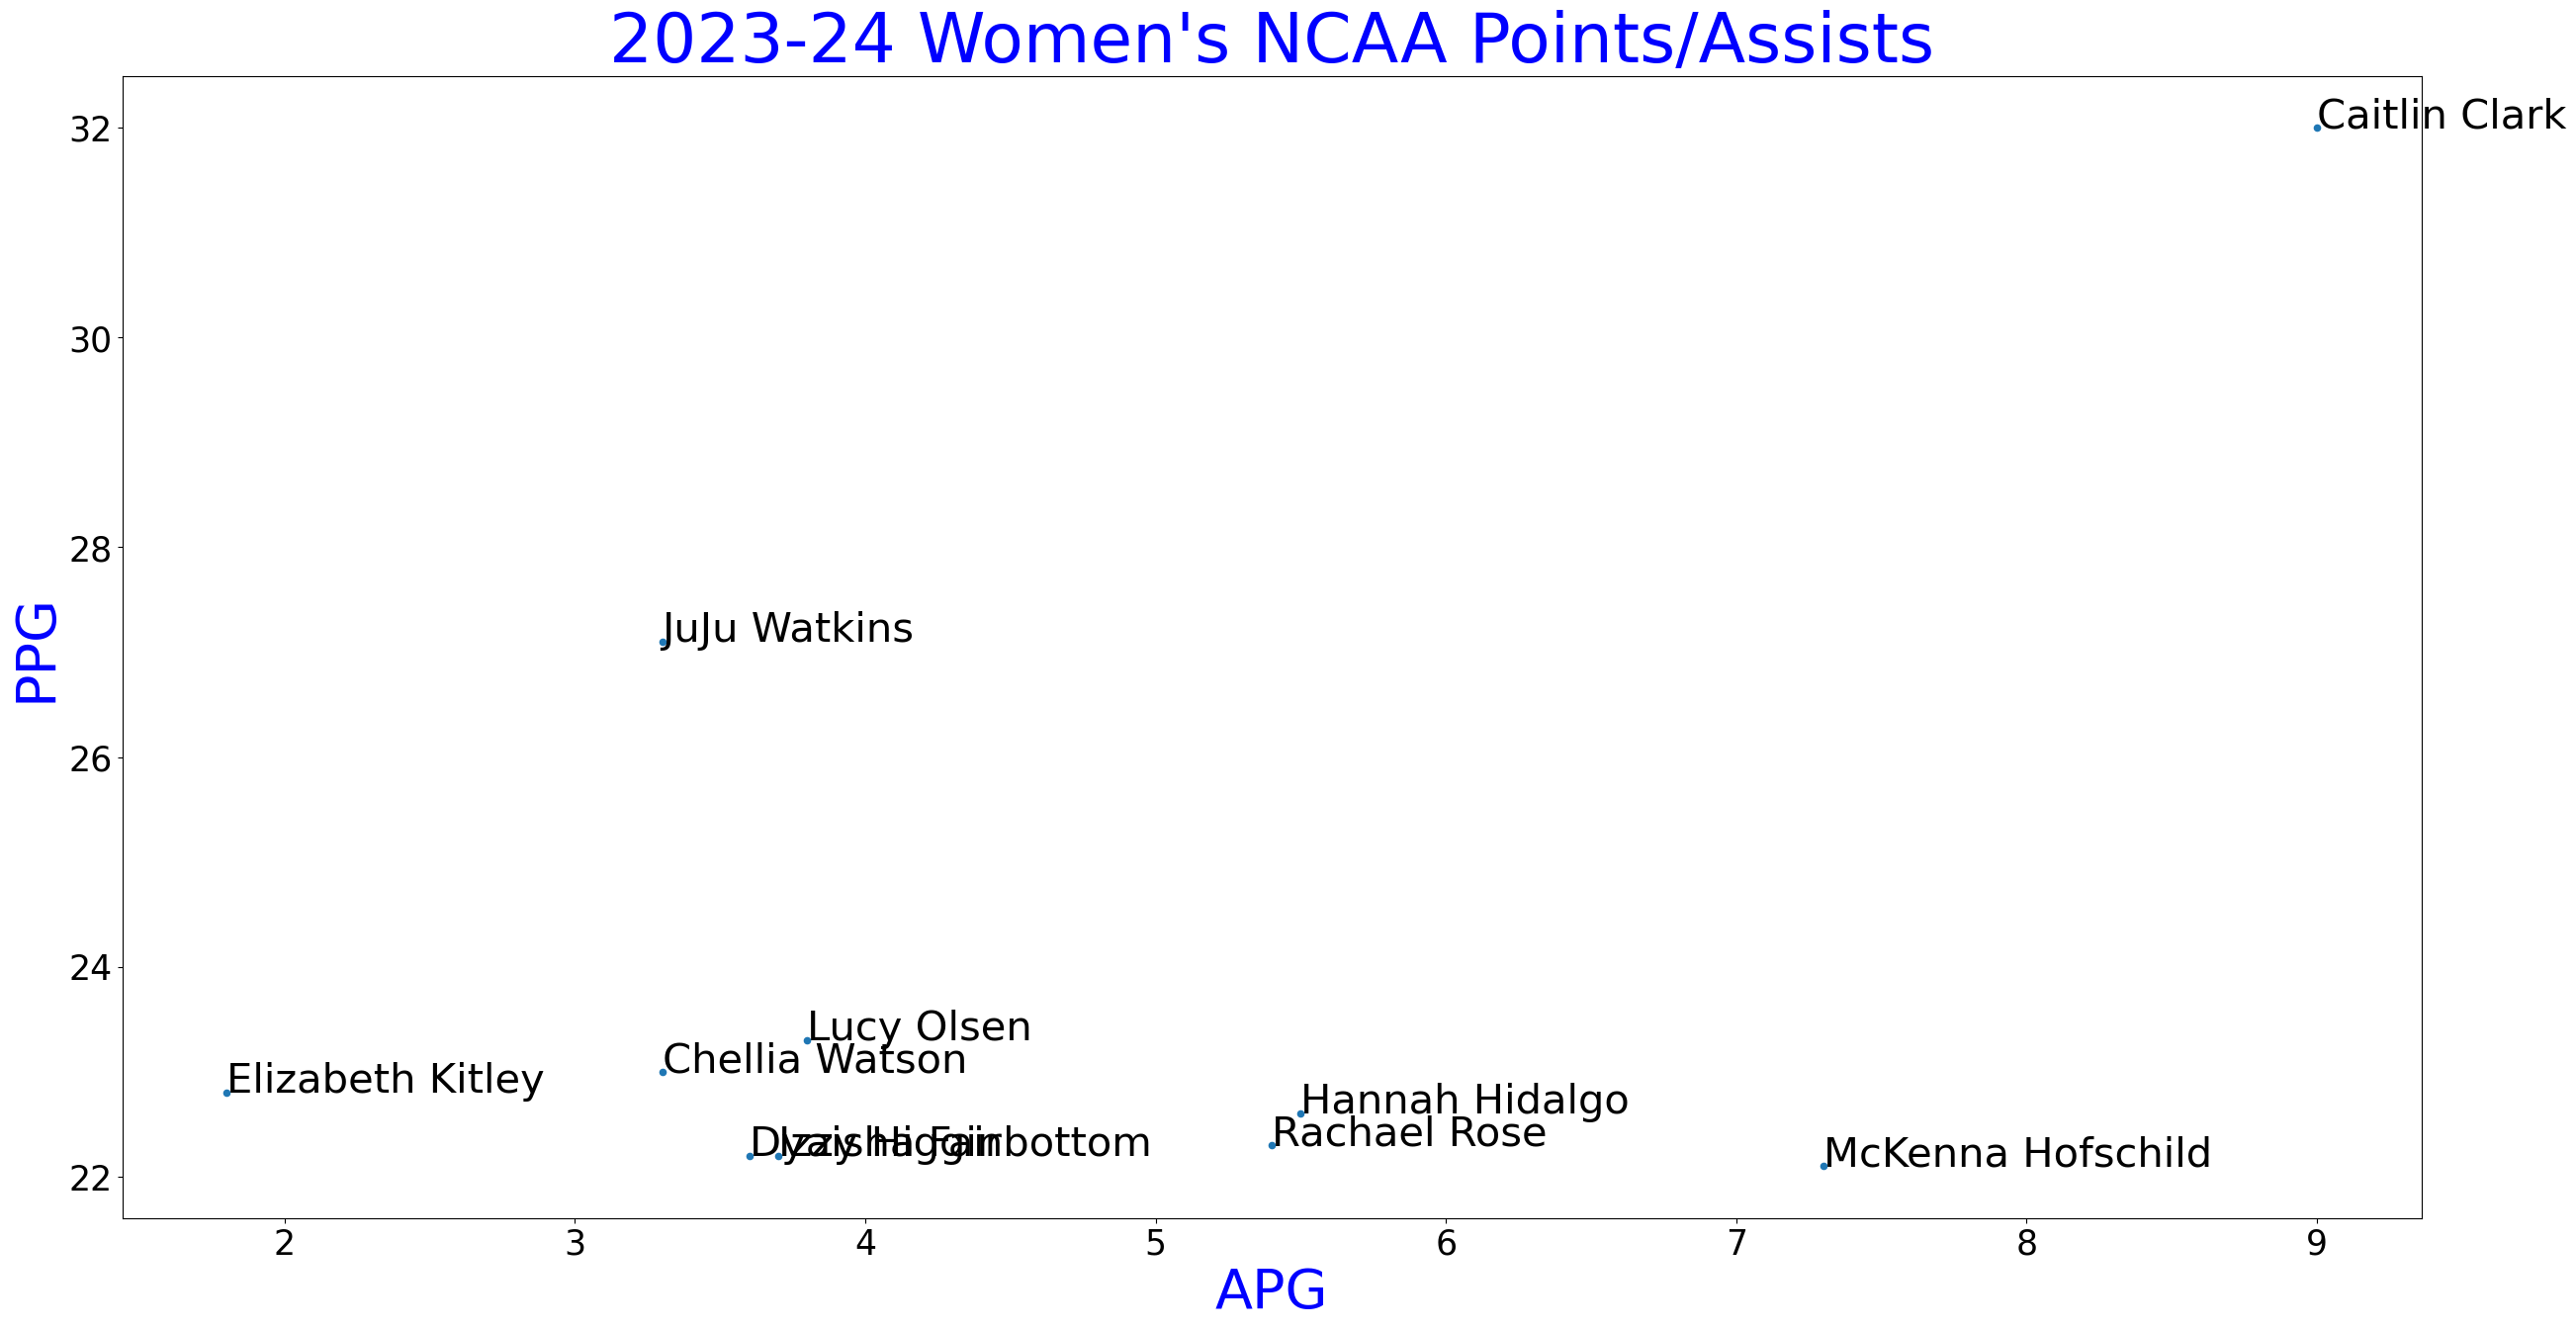

In [8]:
ax = final_df.plot(kind="scatter", x="APG", y="PPG", fontsize=25, figsize=(30,15))
plt.title("2023-24 Women's NCAA Points/Assists", fontsize=50, color="blue")
ax.set_xlabel('APG', fontsize = 40, color="blue") 
ax.set_ylabel('PPG', fontsize = 40, color="blue")

for index, row in final_df.iterrows():
    ax.annotate(row['Name'], (row['APG'], row['PPG']), fontsize=30) 